In [2]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import rgb2hex
from scipy import constants


mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['savefig.transparent'] = False
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.figsize'] = 4.5, 3

In [3]:
### plotting tools
def get_color_cycle(n, colormap, start=0., stop=1., format='hex'):
    if type(colormap) == str:
        colormap = getattr(cm, colormap)

    pts = np.linspace(start, stop, n)
    if format == 'hex':
        colors = [rgb2hex(colormap(pt)) for pt in pts]
    return colors


# tools for color plots
def centers2edges(arr):
    e = (arr[1:] + arr[:-1]) / 2.
    e = np.concatenate(([arr[0] - (e[0] - arr[0])], e))
    e = np.concatenate((e, [arr[-1] + (arr[-1] - e[-1])]))
    return e


def pcolorgrid(xaxis, yaxis):
    xedges = centers2edges(xaxis)
    yedges = centers2edges(yaxis)
    xx, yy = np.meshgrid(xedges, yedges)
    return xx, yy


def ppcolormesh(ax, x, y, z, cmap=cm.viridis, make_grid=True, **kw):
    if make_grid:
        _x, _y = pcolorgrid(x, y)
    else:
        _x, _y = x, y

    im = ax.pcolormesh(_x, _y, z, cmap=cmap, **kw)
    ax.set_xlim(_x.min(), _x.max())
    ax.set_ylim(_y.min(), _y.max())

    return im

# Model description

## Basic idea

To test our ideas on quantum capacitance readout we use a double quantum dot in a reflectometry setup as depicted below. The quantum capacitance causes a shift in tank resonator frequency, which we detect as a phase shift in the reflected photons. In our toy model here we evaluate the shift between zero and full quantum capacitance, and compute an SNR based on signal photon number, phase shift from quantum capacitance, and noise photons.

![Image](Concept_drawings.png)



## Quantum capacitance

We use a very simple model here, where we calculate the quantum capacitance from the tunneling rate between two quantum dots. It is given by

$$
    C_q = \frac{\alpha^2 e^2}{\hbar t}, 
$$

where $\alpha$ is the lever arm of the sensing gate on the dot we measure on, and $t$ is the tunneling rate to the other dot. $t$ can of course also be a co-tunneling rate, the only important thing is that we consider a coherent charge tunneling rate here.


## Reflected signal

### High-Q regime

Since we deal with Qs that are fairly high (even in the simple case they seem higher than a simple estimation of a series LC directly coupled to the tx-line suggests), we use an approximation for the reflection coefficient that doesn't require detailed circuit analysis (See Clerk et al., RMP 2010):

$$
    \Gamma = \frac{\omega - \omega_r + i\omega_r/(2Q)}{\omega-\omega_r-i\omega_r/(2Q)}
$$

$\omega$ is the drive frequency, $\omega_r$ is the resonance frequency, and $Q$ is the Q-factor of the oscillator, which is given by $Q = \omega_r / \kappa$, where $\kappa$ is the **energy** decay rate.

The signature of the quantum capacitance is then the phase shift between the reflection off the resonator with quantum capacitance present or not, i.e., between reflection using resonator frequencies $\omega_{r,0}=(LC)^{-1/2}$ and $\omega_{r,q} = (L(C+C_q))^{-1/2}$.


## Relation to readout signal of an MZM qubit

The readout of the quantum capacitance due to coherent tunnel coupling already gives us a good estimate for a MZM qubit readout. We can understand this as follows. The model for the qubit readout is that we have an interferometric coupling between two dots in the form of 

$$
    \omega_{DD} = \left( \epsilon^2 + (t_0 + \sigma_z t_1)^2) \right)^{1/2} \approx t(1 + \sigma_z) = \pm t/2,
$$

where $t_{0,1}$ are the couplings through the two interferometer arms, and $\sigma_z$ is the Pauli operator of the MZM qubit. Ideally we have $\epsilon=0$ and $t_0 = t_1 \equiv t$ during readout (see RHS). From this we can see that the maximal readout signal in reflection between $\sigma_z = \pm1$ is equivalent to the difference between zero and full quantum capacitance value.


## Amplitude of the readout drive

The readout scheme is based on the value of the interdot coupling beeing a function of the MZM parity operator. Importantly, during readout we probe the difference in phase response between two DD charge ground state configurations. We do not wish to excite the DD system during this readout, since the short lifetime of the excited states will lead to decoherence of the DD system (which will have backaction onto the qubit).

If we're not far off resonance (i.e., in the limit of small $n_g$ for the RF drive) the drive can induce direct transitions. The Hamiltonian of the DD system in our model is (without drive) 

$$
    H_{DD} = \begin{pmatrix}
        -\epsilon/2 & t/2\\
        t/2 & \epsilon/2
    \end{pmatrix},
$$

i.e., a charge qubit formed by the DD. Close to resonance the quantization axis is given by the tunnel coupling, with DD eigenstates $|L\rangle \pm |R\rangle$. The drive modulates the detuning, and the Hamiltonian in this frame is then (assuming lever arm of unity, i.e., worst case)

$$
    H_{DD} = t \sigma_z^{DD} / 2 + eV_{RF} \cos(\omega t) \sigma_x^{DD} / 2\hbar. 
$$

From this we can estimate the probability with which the drive maximally populates the excited state as

$$
    P_{exc} \sim \frac{(eV_{RF}/\hbar)^2}{(eV_{RF}/\hbar)^2 + (t-\omega)^2}.
$$

That means we can estimate the maximal signal power when we put a threshold on $P_{exc}$, giving us a maximally tolerable gate voltage $V_{RF}^{max}$. From the circulating power in the resonator we can then estimate the signal power emitted from the resonator (with $\kappa = \omega/Q$) as

$$
    P_S = \frac{1}{2} C V_{RF}^2 \frac{\omega}{Q}.
$$


## Sensitivity

### Noise

We assume we can describe the amount of noise just by a noise temperature $T_N$ of the detection chain. The noise power added to the reflected signal is then

$$
    P_N = T_N k_B G B,
$$

where $G$ is the gain, and $B$ is the bandwidth. From this we can then simply caclulate the flux of noise photons emitted alongside the signal.


### SNR

The number of signal photons is given by the product of the signal power, measurment time, and gain, divided by photon energy, $P_S T_m G / \hbar\omega$. Given a phase shift of $\theta$ between two signal we want to discriminate, the separation between the signals is thus 

$$
    \Delta = \sqrt{\frac{P_S T_m G}{\hbar \omega}} \sin(\theta/2).
$$

Assuming $B \approx 1/T_m$, the SNR is then simply given by

$$
    \Delta/\sigma = \sqrt{\frac{P_S T_m}{k_B T_N}} \sin(\theta/2)
$$


# TBD


## exact role of Q

* the low-Q model is based on a simple circuit but disagrees with experiments (which give higher Q than what we'd expect). I have ignored the low-Q case here because of that.
* the high-Q model is based on only Q, but we don't have a circuit model (i.e., adding quantum capacitance is added to an 'effective capacitance'.
* in other words, can we find a better model that takes into account Q, but also ensures we work with $C_q$ correctly.


## DD excitation

* how does that extend to real MZM qubits?
* what exactly is the 'bad' stuff that happens when the DD system gets excited? In experiments so far we seem to still gain in SNR when we drive quite a bit harder than what we should be allowed to do with a 0.01 excitation probability.
* so far this seems a worst case model -- should probably be refined.

In [12]:
### Definitions

twopi = np.pi * 2


def volt2omega(V):
    return constants.e * V / (constants.hbar)


def volt2nbar(V, omega, C):
    return C * (np.abs(V))**2 / (constants.hbar * omega)


def volt2pwr(V, C, omega, Q):
    return 0.5 * C * V**2 * omega / Q


def pwr2volt(pwr, C, omega, Q):
    return (2 * pwr * Q / C / omega)**.5


def dBm2pwr(dBm):
    return 1e-3 * 10**(dBm/10)
    

def pwr2dBm(pwr):
    return 10*np.log10(pwr/1e-3)


def pwr2photonflux(pwr, omega):
    return pwr / (constants.hbar * omega)


def dBm2photonflux(dBm, omega):
    return pwr2photonflux(dBm2pwr(dBm), omega)


def noisepwr(T_N, B, G):
    return constants.k * T_N * B * G


def bose_einstein_nth(T_N, omega):
    return (np.exp(constants.hbar * omega / (constants.k * T_N)) - 1)**(-1)


def reflection_hiQ(omega, omega_r, Q):
    """
    Compute the voltage reflection coefficient for the load being a high-Q resonator.
    Inputs:
        * omega : drive frequency
        * omega_r : resonance frequency of the oscillator
        * Q : Q-factor of the oscillator
    """
    Gamma=(omega-omega_r+1j*omega_r/(2*Q))/(omega-omega_r-1j*omega_r/(2*Q))
    return Gamma

  
class GatesensorResponse(object):
    
    default_params = dict(tau=0, alpha=0.5, C=0.3e-12, L=410e-9, Q=100)
    
    def __init__(self, **params):
        _p = self.default_params.copy()
        _p.update(params)
        for p in _p:
            setattr(self, p, _p[p])
        self.omega = self.omega_r(False)
            
    def gatevoltage_from_excitation(self, p_max=0.01):
        return ((p_max * (self.tau-self.omega)**2)/ ((constants.e/constants.hbar)**2 * (1.-p_max)))**(0.5)
    
    def excitation_from_gatevoltage(self, V):
        frabi = volt2omega(V)
        return frabi**2 / (frabi**2 + (self.tau-self.omega)**2)
    
    def Cq(self):
        return self.alpha**2 * constants.e**2 / (2 * constants.hbar * self.tau)
    
    def omega_r(self, Cq_shift=True):
        C = self.C
        if Cq_shift: 
            C += self.Cq()
        return 1./(self.L * C)**.5
    
    def frequency_shift(self):
        return self.omega_r(False) - self.omega_r(True)
    
    def Gamma_vs_omega(self, omega_vals, Cq_shift=True):
        return reflection_hiQ(omega_vals, self.omega_r(Cq_shift), self.Q)
    
    def phase_vs_omega(self, omega_vals, Cq_shift=True):
        G = self.Gamma_vs_omega(omega_vals, Cq_shift)
        phi = np.angle(G, deg=False)
        phi[phi>0] -= twopi
        return phi
        
    def phase_comparison(self, omega_vals):
        return self.phase_vs_omega(omega_vals, False), self.phase_vs_omega(omega_vals, True)

# Example calculations

## Damaz' sample

0.577880604285939


<IPython.core.display.Javascript object>


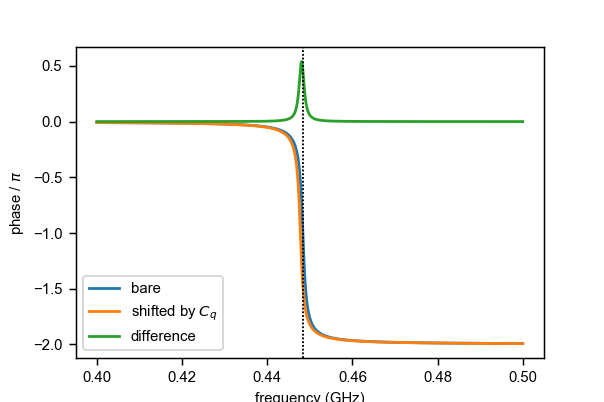

In [13]:
analysis = GatesensorResponse(
    tau=twopi*16e9,
    alpha=0.8,
    C=0.3e-12,
    L=420e-9,
    Q=350,
)

print(analysis.frequency_shift()/twopi*1e-6)

wvals = twopi * np.linspace(400e6, 500e6, 1001)
phi1, phi2 = analysis.phase_comparison(wvals)

fig, ax = plt.subplots(1,1)
ax.plot(wvals/twopi * 1e-9, phi1 / np.pi,
        label=r'bare')
ax.plot(wvals/twopi * 1e-9, phi2 / np.pi,
        label=r'shifted by $C_q$')
ax.plot(wvals/twopi * 1e-9, (phi1-phi2) / np.pi,
        label='difference')

ax.axvline(analysis.omega_r(False)/twopi*1e-9, color='k', lw=1, dashes=[1,1])

ax.set_xlabel('frequency (GHz)')
ax.set_ylabel(r'phase / $\pi$')
ax.legend(loc='best')

2.1438793497727127e-05

In [14]:
v = analysis.gatevoltage_from_excitation(p_max=0.5)
print(v)
pwr2dBm(volt2pwr(v, 0.3e-12, analysis.omega, analysis.Q))

6.431638049318138e-05


-113.01518866225484

In [16]:
dBmvals = np.arange(-60, 5, 5)

for dBm in dBmvals:
    volt = pwr2volt(dBm2pwr(dBm - 79.), 0.3e-12, analysis.omega, analysis.Q)
    p_exc_max = analysis.excitation_from_gatevoltage(volt)
    shift = (1.-p_exc_max) * analysis.frequency_shift()
    print(dBm, volt, p_exc_max * 0.5, shift/twopi * 1e-6)

-60 3.2290965374240757e-06 0.0012571743965640932 0.5764276108859805
-55 5.742235885529214e-06 0.003954037513469409 0.573310681110633
-50 1.0211299842823223e-05 0.01229355147872677 0.5636721943712452
-45 1.8158544260226224e-05 0.0369131663349651 0.535217798550425
-40 3.2290965374240756e-05 0.10066088000338724 0.4615406639573154
-35 5.7422358855292135e-05 0.22177569032278854 0.3215608644066104
-30 0.00010211299842823222 0.3579822501576183 0.16413860619648973
-25 0.00018158544260226224 0.44426554409971225 0.0644157221104126
-20 0.00032290965374240756 0.48092103096200167 0.02205073231366239
-15 0.0005742235885529215 0.49380506612613456 0.007159864261081585
-10 0.001021129984282322 0.4980242516617292 0.002283493287273739
-5 0.0018158544260226223 0.499373520817821 0.000724060336740331
0 0.0032290965374240756 0.49980172001373685 0.0002291643165591138
